In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error
%matplotlib inline

from collections import Counter

In [2]:
df = pd.read_hdf('car.h5')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106494 entries, 0 to 160615
Columns: 155 entries, breadcrumb to car_id
dtypes: bool(70), float64(1), int64(1), object(83)
memory usage: 77.0+ MB


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,feature_kurtyny-powietrzne,feature_klimatyzacja-dwustrefowa,feature_światła-led,feature_czujnik-zmierzchu,feature_elektrycznie-ustawiane-lusterka,feature_asr-(kontrola-trakcji),feature_poduszka-powietrzna-kierowcy,feature_cd,feature_elektryczne-szyby-przednie,feature_poduszka-powietrzna-pasażera,feature_system-start-stop,feature_światła-do-jazdy-dziennej,feature_komputer-pokładowy,feature_elektryczne-szyby-tylne,feature_klimatyzacja-manualna,feature_tapicerka-welurowa,feature_czujnik-deszczu,feature_światła-przeciwmgielne,feature_ogrzewanie-postojowe,feature_radio-niefabryczne,feature_regulowane-zawieszenie,feature_ogranicznik-prędkości,feature_zmieniarka-cd,feature_szyberdach,feature_isofix,feature_asystent-pasa-ruchu,feature_alufelgi,feature_bluetooth,feature_nawigacja-gps,feature_asystent-parkowania,feature_wspomaganie-kierownicy,feature_podgrzewana-przednia-szyba,feature_przyciemniane-szyby,feature_elektrycznie-ustawiane-fotele,feature_klimatyzacja-czterostrefowa,feature_tuner-tv,feature_poduszki-boczne-przednie,feature_tempomat-aktywny,feature_klimatyzacja-automatyczna,feature_poduszki-boczne-tylne,feature_radio-fabryczne,feature_odtwarzacz-dvd,feature_czujniki-parkowania-tylne,feature_łopatki-zmiany-biegów,feature_centralny-zamek,feature_dach-panoramiczny,feature_kamera-cofania,feature_immobilizer,feature_czujnik-martwego-pola,feature_gniazdo-sd,feature_podgrzewane-lusterka-boczne,feature_podgrzewane-przednie-siedzenia,feature_hak,feature_abs,feature_wielofunkcyjna-kierownica,feature_światła-xenonowe,feature_gniazdo-usb,feature_tapicerka-skórzana,feature_gniazdo-aux,feature_esp-(stabilizacja-toru-jazdy),feature_alarm,feature_podgrzewane-tylne-siedzenia,feature_mp3,feature_tempomat,feature_hud-(wyświetlacz-przezierny),feature_elektrochromatyczne-lusterko-wsteczne,feature_relingi-dachowe,feature_elektrochromatyczne-lusterka-boczne,param_liczba-miejsc,param_uszkodzony,param_marka-pojazdu,param_model,param_engine-code,param_liczba-drzwi,param_first-registration,param_country-of-origin,param_pierwsza-rejestracja,param_gearbox,param_przebieg,param_faktura-vat,param_rok-produkcji,param_vin,param_perłowy,param_homologacja-ciężarowa,param_service-record,param_metallic,param_leasing-concession,param_color,param_financing-option,param_original-owner,param_vat-marża,param_kategoria,param_co2-emissions,param_leasing,param_mileage,param_zarejestrowany-jako-zabytek,param_napęd,param_wartość-wykupu,param_typ,param_metalik,param_pierwszy-właściciel,param_skrzynia-biegów,param_vat-discount,param_no-accident,param_liczba-pozostałych-rat,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value,car_id
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarp...",AUTO SPEKTRUM,Dealer,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False

In [4]:
def normalize_price_value(x):
    if x['price_currency'] == 'PLN':
        return x['price_value']
    elif x['price_currency'] == 'EUR':
        return x['price_value'] * 4.5

In [ ]:
df['price_value'].unique()

In [5]:
df['price_value_PLN'] = df[['price_currency', 'price_value']].apply(normalize_price_value, axis=1)

In [6]:
df.isnull().sum()
df = df.fillna(-1)
df.isnull().sum()

breadcrumb                                       0
created_at                                       0
price_currency                                   0
price_details                                    0
price_value                                      0
seller_address                                   0
seller_name                                      0
seller_type                                      0
feature_czujniki-parkowania-przednie             0
feature_poduszka-powietrzna-chroniąca-kolana     0
feature_kurtyny-powietrzne                       0
feature_klimatyzacja-dwustrefowa                 0
feature_światła-led                              0
feature_czujnik-zmierzchu                        0
feature_elektrycznie-ustawiane-lusterka          0
feature_asr-(kontrola-trakcji)                   0
feature_poduszka-powietrzna-kierowcy             0
feature_cd                                       0
feature_elektryczne-szyby-przednie               0
feature_poduszka-powietrzna-pas

In [7]:
df.dtypes

breadcrumb                                        object
created_at                                        object
price_currency                                    object
price_details                                     object
price_value                                      float64
seller_address                                    object
seller_name                                       object
seller_type                                       object
feature_czujniki-parkowania-przednie                bool
feature_poduszka-powietrzna-chroniąca-kolana        bool
feature_kurtyny-powietrzne                          bool
feature_klimatyzacja-dwustrefowa                    bool
feature_światła-led                                 bool
feature_czujnik-zmierzchu                           bool
feature_elektrycznie-ustawiane-lusterka             bool
feature_asr-(kontrola-trakcji)                      bool
feature_poduszka-powietrzna-kierowcy                bool
feature_cd                     

In [31]:
# only bool feats first sice their require no modifications
bool_feats = df.select_dtypes([np.bool]).columns
feats = bool_feats

model = DecisionTreeRegressor(max_depth=5, random_state=0)
get_X_y_and_cros_val(model, feats)

(24930.650454503917, 99.36990415182366)

In [9]:
#Dummy model for reference
model = DummyRegressor()
X = df[ 'seller_address' ]
y = df['price_value_PLN']
model.fit(X, y)
y_pred = model.predict(X)
mean_absolute_error(y_pred, y)

39702.02572163561

In [10]:
def get_X_y_and_cros_val(model, feats):
    X = df[ feats ]
    y = df['price_value_PLN']
    
    scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
    
    return max(scores) * -1, np.std(scores)

In [12]:
df.select_dtypes([np.object]).sample(20)

,breadcrumb,created_at,price_currency,price_details,seller_address,seller_name,seller_type,param_liczba-miejsc,param_uszkodzony,param_marka-pojazdu,param_model,param_engine-code,param_liczba-drzwi,param_first-registration,param_country-of-origin,param_pierwsza-rejestracja,param_gearbox,param_przebieg,param_faktura-vat,param_rok-produkcji,param_vin,param_perłowy,param_homologacja-ciężarowa,param_service-record,param_metallic,param_leasing-concession,param_color,param_financing-option,param_original-owner,param_vat-marża,param_kategoria,param_co2-emissions,param_leasing,param_mileage,param_zarejestrowany-jako-zabytek,param_napęd,param_wartość-wykupu,param_typ,param_metalik,param_pierwszy-właściciel,param_skrzynia-biegów,param_vat-discount,param_no-accident,param_liczba-pozostałych-rat,param_particle-filter,param_zarejestrowany-w-polsce,param_oferta-od,param_moc,param_make,param_kraj-pochodzenia,param_engine-power,param_year,param_serwisowany-w-aso,param_rodzaj-paliwa,param_możliwość-finansowania,param_registered-in-poland,param_transmission,param_miesięczna-rata,param_kod-silnika,param_version,param_opłata-początkowa,param_model-pojazdu,param_pojemność-skokowa,param_kierownica-po-prawej-(anglik),param_fuel-type,param_vat-free,param_acrylic,param_damaged,param_door-count,param_tuning,param_filtr-cząstek-stałych,param_nr-of-seats,param_kolor,param_engine-capacity,param_pearl,param_stan,param_wersja,param_emisja-co2,param_body-type,param_matowy,param_bezwypadkowy,param_akryl-(niemetalizowany),param_monthly-payment-value
78190,"[Osobowe, Nissan, Primera, Nissan Primera P12 ...","15:24, 28 lutego 2018",PLN,"Cena Brutto, Do negocjacji","Wrocław, Dolnośląskie, Krzyki",-1,Osoba prywatna,5,-1,Nissan,-1,-1,5,-1,-1,1 grudzień 2004,-1,185 300 km,-1,2005,-1,Tak,-1,-1,-1,-1,-1,-1,-1,Tak,Osobowe,-1,-1,-1,-1,Na przednie koła,-1,Kombi,Tak,Tak,Manualna,-1,-1,-1,-1,-1,Osoby prywatnej,115 KM,-1,Niemcy,-1,-1,Tak,Benzyna,-1,-1,-1,-1,-1,-1,-1,Primera,1 800 cm3,-1,-1,-1,-1,-1,-1,-1,-1,-1,Srebrny,-1,-1,Używane,P12 (2001-2007),-1,-1,-1,Tak,-1,-1
117024,"[Osobowe, Citroën, C5, Citroën C5 III (2008-)]","17:48, 2 marca 2018",PLN,"Cena Brutto, Do negocjacji","Żory, Śląskie",-1,Osoba prywatna,5,-1,Citroën,-1,-1,5,-1,-1,-1,-1,213 000 km,-1,2012,-1,-1,-1,-1,-1,-1,-1,-1,-1,Tak,Osobowe,-1,-1,-1,-1,Na przednie koła,-1,Auta miejskie,Tak,Tak,"Półautomatyczna (ASG, Tiptronic)",-1,-1,-1,-1,-1,Osoby prywatnej,116 KM,-1,Niemcy,-1,-1,Tak,Diesel,-1,-1,-1,-1,-1,-1,-1,C5,1 600 cm3,-1,-1,-1,-1,-1,-1,-1,-1,-1,Czarny,-1,-1,Używane,III (2008-),-1,-1,-1,Tak,-1,-1
40563,"[Osobowe, Renault, Talisman]","17:45, 5 marca 2018",PLN,"Cena Brutto, Faktura VAT","Al. 29-Listopada 149 - 31-406 Kraków, Prądnik ...",Anndora Autoryzowany Dealer Renault w Krakowie,Dealer,5,-1,Renault,-1,-1,5,-1,-1,-1,-1,10 507 km,Tak,2017,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,Osobowe,-1,-1,-1,-1,Na przednie koła,-1,Kombi,Tak,Tak,"Automatyczna dwusprzęgłowa (DCT, DSG)",-1,-1,-1,-1,Tak,Firmy,200 KM,-1,Polska,-1,-1,Tak,Benzyna,Tak,-1,-1,-1,-1,-1,-1,Talisman,1 618 cm3,-1,-1,-1,-1,-1,-1,-1,-1,-1,Inny kolor,-1,-1,Używane,-1,-1,-1,-1,Tak,-1,-1
139728,"[Osobowe, BMW, Seria 3, 330, BMW Seria 3 E46 (...","20:11, 28 lutego 2018",PLN,"Cena Brutto, Do negocjacji","Bolesławiec, bolesławiecki, Dolnośląskie",-1,Osoba prywatna,5,-1,BMW,-1,-1,5,-1,-1,29 kwiecień 2002,-1,229 000 km,-1,2002,WBAEV51070KM66190,-1,-1,-1,-1,-1,-1,-1,-1,-1,Osobowe,-1,-1,-1,-1,Na tylne koła,-1,Sedan,Tak,-1,Manualna,-1,-1,-1,-1,Tak,Osoby prywatnej,231 KM,-1,Niemcy,-1,-1,-1,Benzyna,-1,-1,-1,-1,330,-1,-1,Seria 3,3 000 cm3,-1,-1,-1,-1,-1,-1,-1,-1,-1,Niebieski,-1,-1,Używane,E46 (1998-2007),-1,-1,-1,Tak,-1,-1
114077,"[Osobowe, Opel, Vectra, Opel Vectra C (2002-20...","19:41, 4 marca 2018",PLN,"Cena Brutto, Do negocjacji","Braniewo, braniewski, Warmińsko-mazurskie",-1,Osoba prywatna,5,-1,Opel,-1,-1,5,-1,-1,-1,-1,143 000 km,-1,2006,w0l0zcf6871000598,-1,-1,-1,-1,-1,-1,-1,-1,-1,Osobowe,-1,-1,-1,-1,Na przednie koła,-1,Sedan,Tak,-1,Manualna,-1,-1,-1,-1,-1,Osoby prywatnej,1

In [13]:
# feats worth merging
doubles = {'param_liczba-drzwi': 'param_door-count',
          'param_przebieg': 'param_mileage',
           'param_pojemność-skokowa': 'param_engine-capacity',
           'param_emisja-co2': 'param_co2-emissions',
           'param_rok-produkcji': 'param_year'
          }

# numerical feats
num_feats = ['param_liczba-miejsc', 'param_liczba-drzwi', 'param_przebieg', 'param_moc', 'param_pojemność-skokowa', 'param_emisja-co2', 'param_wartość-wykupu', 'param_liczba-pozostałych-rat', 'param_miesięczna-rata', 'param_opłata-początkowa']

# date feats
date_feats = ['param_rok-produkcji', 'created_at', 'param_pierwsza-rejestracja']

black_list = ['breadcrumb', 'created_at', 'price_details']

In [14]:
df['param_engine-capacity'].unique()

array([-1, '1 600 cm3', '1 995 cm3', '1 364 cm3', '3 000 cm3',
       '2 200 cm3', '2 953 cm3', '1 598 cm3', '2 143 cm3', '1 700 cm3',
       '1 395 cm3', '2 500 cm3', '1 400 cm3', '1 200 cm3', '1 910 cm3',
       '1 997 cm3', '1 968 cm3', '1 896 cm3', '1 686 cm3', '2 698 cm3',
       '1 975 cm3', '2 400 cm3', '1 242 cm3', '1 998 cm3', '1 500 cm3',
       '2 231 cm3', '3 600 cm3', '2 000 cm3', '1 800 cm3', '1 595 cm3',
       '1 498 cm3', '1 100 cm3', '1 300 cm3', '998 cm3', '1 248 cm3',
       '1 956 cm3', '1 461 cm3', '1 499 cm3', '1 999 cm3'], dtype=object)

In [15]:
def print_by_line(lst):
    for l in lst:
        print(l)

In [16]:
cat_black_list = black_list + num_feats + date_feats

cat_feats = df.select_dtypes([np.object]).columns
cat_feats = [x for x in cat_feats if x not in cat_black_list]
    
cat_feats

['price_currency',
 'seller_address',
 'seller_name',
 'seller_type',
 'param_uszkodzony',
 'param_marka-pojazdu',
 'param_model',
 'param_engine-code',
 'param_first-registration',
 'param_country-of-origin',
 'param_gearbox',
 'param_faktura-vat',
 'param_vin',
 'param_perłowy',
 'param_homologacja-ciężarowa',
 'param_service-record',
 'param_metallic',
 'param_leasing-concession',
 'param_color',
 'param_financing-option',
 'param_original-owner',
 'param_vat-marża',
 'param_kategoria',
 'param_co2-emissions',
 'param_leasing',
 'param_mileage',
 'param_zarejestrowany-jako-zabytek',
 'param_napęd',
 'param_typ',
 'param_metalik',
 'param_pierwszy-właściciel',
 'param_skrzynia-biegów',
 'param_vat-discount',
 'param_no-accident',
 'param_particle-filter',
 'param_zarejestrowany-w-polsce',
 'param_oferta-od',
 'param_make',
 'param_kraj-pochodzenia',
 'param_engine-power',
 'param_year',
 'param_serwisowany-w-aso',
 'param_rodzaj-paliwa',
 'param_możliwość-finansowania',
 'param_regis

In [17]:
cat_feat_prefix = '__cat'
for cat in cat_feats:
    df[cat + cat_feat_prefix] = pd.factorize( df[cat] )[0]
    
cat_feats = df.columns
cat_feats = [x for x in cat_feats if cat_feat_prefix in x]
cat_feats

['price_currency__cat',
 'seller_address__cat',
 'seller_name__cat',
 'seller_type__cat',
 'param_uszkodzony__cat',
 'param_marka-pojazdu__cat',
 'param_model__cat',
 'param_engine-code__cat',
 'param_first-registration__cat',
 'param_country-of-origin__cat',
 'param_gearbox__cat',
 'param_faktura-vat__cat',
 'param_vin__cat',
 'param_perłowy__cat',
 'param_homologacja-ciężarowa__cat',
 'param_service-record__cat',
 'param_metallic__cat',
 'param_leasing-concession__cat',
 'param_color__cat',
 'param_financing-option__cat',
 'param_original-owner__cat',
 'param_vat-marża__cat',
 'param_kategoria__cat',
 'param_co2-emissions__cat',
 'param_leasing__cat',
 'param_mileage__cat',
 'param_zarejestrowany-jako-zabytek__cat',
 'param_napęd__cat',
 'param_typ__cat',
 'param_metalik__cat',
 'param_pierwszy-właściciel__cat',
 'param_skrzynia-biegów__cat',
 'param_vat-discount__cat',
 'param_no-accident__cat',
 'param_particle-filter__cat',
 'param_zarejestrowany-w-polsce__cat',
 'param_oferta-od_

In [32]:
# bool and cat feats now. You can see the improvement
feats = list(bool_feats) + list(cat_feats)
get_X_y_and_cros_val(model)

(20171.950836919234, 167.76235577830786)

In [18]:
num_feats

['param_liczba-miejsc',
 'param_liczba-drzwi',
 'param_przebieg',
 'param_moc',
 'param_pojemność-skokowa',
 'param_emisja-co2',
 'param_wartość-wykupu',
 'param_liczba-pozostałych-rat',
 'param_miesięczna-rata',
 'param_opłata-początkowa']

In [19]:
df['param_pojemność-skokowa'].unique()

array(['898 cm3', '1 560 cm3', '3 000 cm3', ..., '5 992 cm3', '1 966 cm3',
       '142 280 cm3'], dtype=object)

In [20]:
def check_if_complementing(feat1, feat2): #  count of instances when data only in that column
    has_data = []
    for i in range(df.shape[0]):
        if df[feat1].iloc[i] != -1 and df[feat2].iloc[i] != -1:
            has_data.append('both')        
        elif df[feat1].iloc[i] != -1:
            has_data.append(feat1)
        elif df[feat2].iloc[i] != -1:
            has_data.append(feat2)
    print(Counter(has_data))
    print()

In [21]:
for feat1, feat2 in doubles.items():
    check_if_complementing(feat1, feat2)

Counter({'param_liczba-drzwi': 96594, 'param_door-count': 74})

Counter({'param_przebieg': 106057, 'param_mileage': 82})

Counter({'param_pojemność-skokowa': 101389, 'param_engine-capacity': 79})

Counter({'param_emisja-co2': 2086, 'param_co2-emissions': 3})

Counter({'param_rok-produkcji': 106302, 'param_year': 83})



In [22]:
def merge_data(x):
    if x.iloc[0] == -1 and x.iloc[1] != -1:
        return x.iloc[1]
    else:
        return x.iloc[0]

In [23]:
#marge data in doubles dictionary
for feat1, feat2 in doubles.items():
    df[feat1] = df[[feat1, feat2]].apply(merge_data, axis=1)

In [24]:
def get_rid_of_unit_and_dec(val):
    if val == -1:
        return -1

    st = ''.join(val.split(' ')[:-1])
    
    if ',' in st:
        st = ''.join(st.split(',')[:-1])

    val = int(st)
        
    return val

In [25]:
print_by_line(num_feats)

param_liczba-miejsc
param_liczba-drzwi
param_przebieg
param_moc
param_pojemność-skokowa
param_emisja-co2
param_wartość-wykupu
param_liczba-pozostałych-rat
param_miesięczna-rata
param_opłata-początkowa


In [26]:
num_feat_prefix = '__num'
df['param_liczba-miejsc' + num_feat_prefix] = df['param_liczba-miejsc'].astype(np.int8)
df['param_liczba-drzwi' + num_feat_prefix] = df['param_liczba-drzwi'].astype(np.int8)

df['param_przebieg' + num_feat_prefix] = df['param_przebieg'].map(get_rid_of_unit_and_dec)
df['param_moc' + num_feat_prefix] = df['param_moc'].map(get_rid_of_unit_and_dec)
df['param_pojemność-skokowa' + num_feat_prefix] = df['param_pojemność-skokowa'].map(get_rid_of_unit_and_dec)
df['param_emisja-co2' + num_feat_prefix] = df['param_emisja-co2'].map(get_rid_of_unit_and_dec)
df['param_wartość-wykupu' + num_feat_prefix] = df['param_wartość-wykupu'].map(get_rid_of_unit_and_dec)
df['param_miesięczna-rata' + num_feat_prefix] = df['param_miesięczna-rata'].map(get_rid_of_unit_and_dec)
df['param_opłata-początkowa' + num_feat_prefix] = df['param_opłata-początkowa'].map(get_rid_of_unit_and_dec)

df['param_liczba-pozostałych-rat' + num_feat_prefix] = df['param_liczba-pozostałych-rat'].map(lambda x: int(''.join(x.split(' '))) if x != -1 else -1 )

df['param_rok-produkcji' + num_feat_prefix] = df['param_rok-produkcji'].astype(np.int16)
num_feats = [x for x in df.columns if num_feat_prefix in x]

In [27]:
df[num_feats].head()

,param_liczba-miejsc__num,param_liczba-drzwi__num,param_przebieg__num,param_moc__num,param_pojemność-skokowa__num,param_emisja-co2__num,param_wartość-wykupu__num,param_miesięczna-rata__num,param_opłata-początkowa__num,param_liczba-pozostałych-rat__num,param_rok-produkcji__num
0,-1,4,1,90,898,-1,-1,-1,-1,-1,2018
2,5,5,209533,115,1560,-1,-1,-1,-1,-1,2011
3,5,5,30500,262,3000,-1,-1,-1,-1,-1,2015
4,-1,-1,129500,110,1560,-1,-1,-1,-1,-1,2009
5,5,5,29100,310,1984,-1,-1,-1,-1,-1,2017


In [30]:
print_by_line(date_feats)

param_rok-produkcji
created_at
param_pierwsza-rejestracja


In [33]:
feats = list(bool_feats) + list(cat_feats) + list(num_feats)
get_X_y_and_cros_val(model)

(14315.407811972489, 143.15607936671194)

In [34]:
num_feats

['param_liczba-miejsc__num',
 'param_liczba-drzwi__num',
 'param_przebieg__num',
 'param_moc__num',
 'param_pojemność-skokowa__num',
 'param_emisja-co2__num',
 'param_wartość-wykupu__num',
 'param_miesięczna-rata__num',
 'param_opłata-początkowa__num',
 'param_liczba-pozostałych-rat__num',
 'param_rok-produkcji__num']

In [35]:
# for num_feat in num_feats:
#     if num_feat != 'param_przebieg__num': # Takes too long
#         plt.figure(figsize=(20,10))
#         ax = sns.barplot(x=num_feat, y='price_value_PLN', data=df, color='#3498db');
#         plt.xticks(rotation=90);

In [36]:
# plt.figure(figsize=(20,10))
# ax = sns.barplot(x='param_przebieg__num', y='price_value_PLN', data=df, color='#33ccff');
# plt.xticks(rotation=90);

In [37]:
f = 'price_currency__cat'
print(f)
f[:-len(cat_feat_prefix)]

price_currency__cat


'price_currency'

In [38]:
# cat_no_plot = ['price_currency__cat', 'seller_address__cat', 'seller_name__cat', 'param_engine-code__cat','param_vin__cat', 'param_kod-silnika__cat']
# for cat_feat in cat_feats:
#     if cat_feat not in cat_no_plot:
#         cat_name = cat_feat[:-len(cat_feat_prefix)]
#         plt.figure(figsize=(20,10))
#         sns.barplot(x=cat_name, y='price_value_PLN', data=df, order=df[cat_name].value_counts().index, color='#3498db');
#         plt.xticks(rotation=90);

# Model optimization

In [39]:
feats = list(bool_feats) + list(cat_feats) + list(num_feats)
X = df[ feats ]
y = df['price_value_PLN']
feats

['feature_czujniki-parkowania-przednie',
 'feature_poduszka-powietrzna-chroniąca-kolana',
 'feature_kurtyny-powietrzne',
 'feature_klimatyzacja-dwustrefowa',
 'feature_światła-led',
 'feature_czujnik-zmierzchu',
 'feature_elektrycznie-ustawiane-lusterka',
 'feature_asr-(kontrola-trakcji)',
 'feature_poduszka-powietrzna-kierowcy',
 'feature_cd',
 'feature_elektryczne-szyby-przednie',
 'feature_poduszka-powietrzna-pasażera',
 'feature_system-start-stop',
 'feature_światła-do-jazdy-dziennej',
 'feature_komputer-pokładowy',
 'feature_elektryczne-szyby-tylne',
 'feature_klimatyzacja-manualna',
 'feature_tapicerka-welurowa',
 'feature_czujnik-deszczu',
 'feature_światła-przeciwmgielne',
 'feature_ogrzewanie-postojowe',
 'feature_radio-niefabryczne',
 'feature_regulowane-zawieszenie',
 'feature_ogranicznik-prędkości',
 'feature_zmieniarka-cd',
 'feature_szyberdach',
 'feature_isofix',
 'feature_asystent-pasa-ruchu',
 'feature_alufelgi',
 'feature_bluetooth',
 'feature_nawigacja-gps',
 'featur

In [40]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
[x * -1 for x in scores], np.std(scores)

([10710.47495778305, 10780.386112788776, 10595.83878493149], 76.0750637634758)

In [41]:
model = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
[x * -1 for x in scores], np.std(scores)

([9329.931397919938, 9539.686694442089, 9505.317254817395], 91.85661628554367)

In [42]:
model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
[x * -1 for x in scores], np.std(scores)

([9118.229734760174, 9316.111754572237, 9238.664339568606], 81.41791359741791)

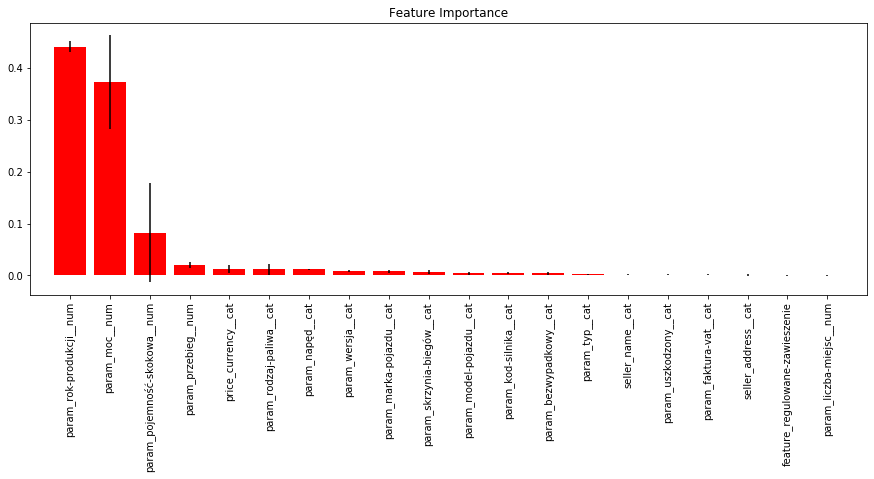

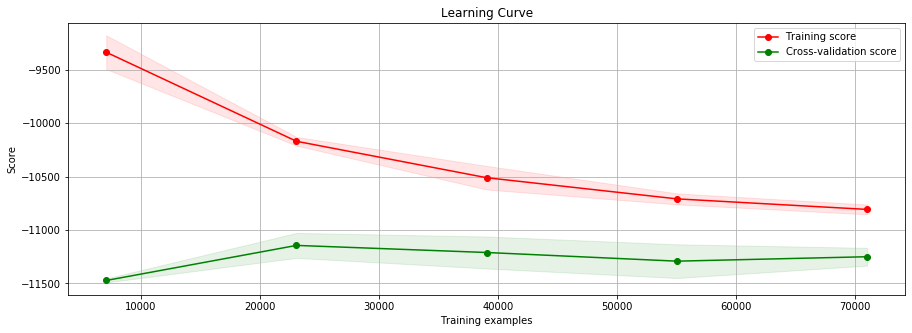

In [43]:
model = RandomForestRegressor(max_depth=7, n_estimators=20, random_state=0)
model.fit(X, y)
skplt.estimators.plot_feature_importances(model, feature_names=feats, x_tick_rotation=90, figsize=(15, 5))
skplt.estimators.plot_learning_curve(model, X, y, figsize=(15, 5), cv=3, scoring='neg_mean_absolute_error');

In [44]:
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [45]:
m = RandomForestRegressor(max_depth=7, n_estimators=20, random_state=0)
m.fit(X,y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=feats)

Weight,Feature
0.7352 ± 0.0034,param_rok-produkcji__num
0.4338 ± 0.0040,param_moc__num
0.0535 ± 0.0011,param_pojemność-skokowa__num
0.0373 ± 0.0043,param_przebieg__num
0.0183 ± 0.0004,param_napęd__cat
0.0166 ± 0.0013,param_rodzaj-paliwa__cat
0.0164 ± 0.0009,price_currency__cat
0.0118 ± 0.0010,param_wersja__cat
0.0104 ± 0.0007,param_skrzynia-biegów__cat
0.0091 ± 0.0009,param_marka-pojazdu__cat


In [46]:
import xgboost as xgb

In [47]:
xgb_params = {
    'max_depth' :10,
    'n_estimators' :50,
    'learning_rate': 0.1,
    'seed': 0
}

In [48]:
model = xgb.XGBRegressor(**xgb_params)
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
[x * -1 for x in scores], np.std(scores)

([7089.285466125925, 7223.093132148703, 7125.794250982848], 56.474630621308954)

In [ ]:
m = xgb.XGBRegressor(**xgb_params)
m.fit(X, y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=feats)

In [ ]:
skplt.estimators.plot_learning_curve(model, X, y, figsize=(15, 5), cv=3, scoring='neg_mean_absolute_error');

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK

In [ ]:
def obj_func(params):
    print("Training with params: ")
    print(params)
    model = xgb.XGBRegressor(params)
    
    scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
    mean_mae, score_std = np.mean(scores), np.std(scores)
    
    return {'loss' : np.abs(mean_mae), 'status': STATUS_OK}

xgb_reg_params = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
    'max_depth': hp.choice('max_depth', np.arange(5, 16, 1, dtype=int)),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.quniform('colsample_btree', 0.5, 1, 0.05),
    'objective': 'reg:squarederror',
    'n_estimators': 100,
    'seed': 0,
}

best = fmin(obj_func, xgb_reg_params, algo=tpe.suggest, max_evals=25)

best

In [ ]:
xgb_params = {
    'max_depth' : 3,
    'n_estimators' : 50,
    'learning_rate': 0.1,
    'seed': 0,
    'colsample_btree': 0.75,
    'subsample': 0.6
}

In [ ]:
model = xgb.XGBRegressor(**xgb_params)
scores = cross_val_score(model, X, y, cv=3, scoring="neg_mean_absolute_error")
[x * -1 for x in scores], np.std(scores)

In [ ]:
m = model = xgb.XGBRegressor(**xgb_params)
m.fit(X, y)

imp = PermutationImportance(m, random_state=0).fit(X,y)
eli5.show_weights(imp, feature_names=feats)

# Train test vlidate

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
model = xgb.XGBRegressor(**xgb_params)

cv = KFold(n_splits=2, random_state=0, shuffle=True)
scores = []
for train_idx, test_idx in cv.split(y_train):
    model.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    y_pred = model.predict(X_train.iloc[test_idx])
    
    score = mean_absolute_error(y_train.iloc[test_idx], y_pred)
    scores.append(score)
    
[x * -1 for x in scores], np.std(scores)

In [ ]:
y_pred_val = model.predict(X_test)
mean_absolute_error(y_pred_val, y_test)

In [ ]:
x = [4, 3, 2, 8]
y = [2, 5, 2, 6]
plt.bar(x, y)
plt.show()
plt.plot(x, y)
plt.show()

In [ ]:
points = zip(x, y)
points = list(point)
points.sort(key=lambda x: x[0])
x = [point[i][0] for i in range(len(points))]
y = [point[i][1] for i in range(len(points))]
print(x)
print(y)
plt.bar(x, y)
plt.show()
plt.plot(x, y)
plt.show()